# Speed from Position Data

In this Notebook you'll work with data just like the data you'll be using in the final project for this course. That data comes from CSVs that looks like this:

| timestamp | displacement  | yaw_rate | acceleration |
| :-------: | :----------: | :------: | :----------: |
| 0.0 | 0 | 0.0 | 0.0 |
| 0.25 | 0.0 | 0.0 | 19.6 |
| 0.5 | 1.225 | 0.0 | 19.6 |
| 0.75 | 3.675 | 0.0 | 19.6 |
| 1.0 | 7.35 | 0.0 | 19.6 |
| 1.25 | 12.25 | 0.0 | 0.0 |
| 1.5 | 17.15 | -2.82901631903 | 0.0 |
| 1.75 | 22.05 | -2.82901631903 | 0.0 |
| 2.0 | 26.95 | -2.82901631903 | 0.0 |
| 2.25 | 31.85 | -2.82901631903 | 0.0 |

In [1]:
from helpers import process_data
from matplotlib import pyplot as plt

In [2]:
PARALLEL_PARK_DATA = process_data("parallel_park.pickle")

In [3]:
# This is what the first few entries in the parallel 
#   park data look like. 

PARALLEL_PARK_DATA[:5]

[(np.float64(0.0), 0, np.float64(0.0), np.float64(0.0)),
 (np.float64(0.0625),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(1.9600000000000002)),
 (np.float64(0.125),
  np.float64(-0.007656250000000001),
  np.float64(0.0),
  np.float64(1.9600000000000002)),
 (np.float64(0.1875),
  np.float64(-0.022968750000000003),
  np.float64(-0.0),
  np.float64(1.9600000000000002)),
 (np.float64(0.25),
  np.float64(-0.045937500000000006),
  np.float64(-0.0),
  np.float64(1.9600000000000002))]

In [4]:
# In this exercise we'll be differentiating (taking the
# derivative of) displacement data. This will require 
# using only the first two columns of this data.
timestamps    = [row[0] for row in PARALLEL_PARK_DATA]
displacements = [row[1] for row in PARALLEL_PARK_DATA]

# You'll use these data in the next lesson on integration
# You can ignore them for now.
yaw_rates     = [row[2] for row in PARALLEL_PARK_DATA]
accelerations = [row[3] for row in PARALLEL_PARK_DATA]

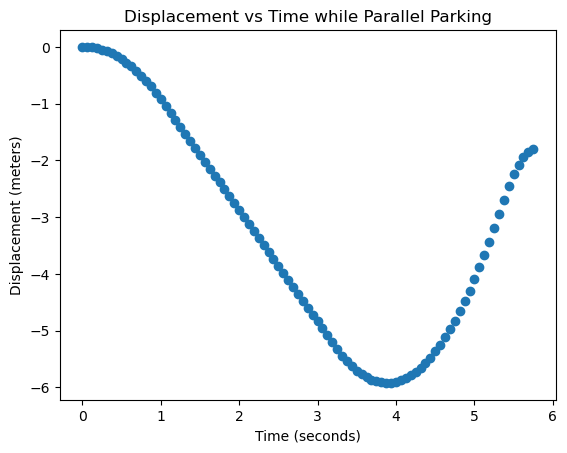

In [5]:
plt.title("Displacement vs Time while Parallel Parking")
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (meters)")
plt.scatter(timestamps, displacements)
plt.show()

In [7]:
#print(timestamps)

In [9]:
#print(displacements)

In the graph above, you can see displacement vs time data for a car as it parallel parks. Note that backwards motion winds back the odometer and reduces displacement (this isn't actually how odometers work on modern cars. Sorry Ferris Bueller)

Note how for approximately 4 seconds the motion is backwards and then for the last two the car goes forwards.

Let's look at some data somewhere in the middle of this trajectory

In [10]:
print(timestamps[20:22])
print(displacements[20:22])

[np.float64(1.25), np.float64(1.3125)]
[np.float64(-1.4087500000000004), np.float64(-1.5312500000000004)]


So you can see that at $t=1.25$ the car has displacement $x=-1.40875$ and at $t=1.3125$ the car has displacement $x=-1.53125$

This means we could calculate the speed / slope as follows:

$$\text{slope} = \frac{\text{vertical change}}{\text{horizontal change}} = \frac{\Delta x}{\Delta t}$$

and for the numbers I just mentioned this would mean:

$$\frac{\Delta x}{\Delta t} = \frac{-1.53125 - -1.40875}{1.3125 - 1.25} = \frac{-0.1225 \text{ meters}}{0.0625\text{ seconds}} = -1.96 \frac{m}{s}$$

So I can say the following:

> Between $t=1.25$ and $t=1.3125$ the vehicle had an **average speed** of **-1.96 meters per second**

I could make this same calculation in code as follows

In [12]:
delta_x = displacements[21] - displacements[20]
delta_t = timestamps[21] - timestamps[20]
slope   = delta_x / delta_t

print(slope)

-1.9600000000000009


Earlier in this lesson you worked with truly continuous functions. In that situation you could make $\Delta t$ as small as you wanted!

But now we have real data, which means the size of $\Delta t$ is dictated by how frequently we made measurements of displacement. In this case it looks like subsequent measurements are separated by

$$\Delta t = 0.0625 \text{ seconds}$$

In the `get_derivative_from_data` function below, I demonstrate how to "take a derivative" of real data. Read through this code and understand how it works: in the next notebook you'll be asked to reproduce this code yourself.

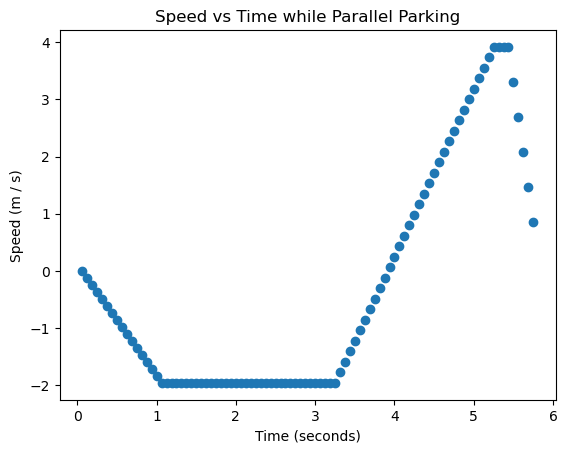

In [13]:
def get_derivative_from_data(position_data, time_data):
    """
    Calculates a list of speeds from position_data and 
    time_data.
    
    Arguments:
      position_data - a list of values corresponding to 
        vehicle position
 
      time_data     - a list of values (equal in length to
        position_data) which give timestamps for each 
        position measurement
    
    Returns:
      speeds        - a list of values (which is shorter 
        by ONE than the input lists) of speeds.
    """
    # 1. Check to make sure the input lists have same length
    if len(position_data) != len(time_data):
        raise(ValueError, "Data sets must have same length")
    
    # 2. Prepare empty list of speeds
    speeds = []
    
    # 3. Get first values for position and time
    previous_position = position_data[0]
    previous_time     = time_data[0]
    
    # 4. Begin loop through all data EXCEPT first entry
    for i in range(1, len(position_data)):
        
        # 5. get position and time data for this timestamp
        position = position_data[i]
        time     = time_data[i]
        
        # 6. Calculate delta_x and delta_t
        delta_x = position - previous_position
        delta_t = time - previous_time
        
        # 7. Speed is slope. Calculate it and append to list
        speed = delta_x / delta_t
        speeds.append(speed)
        
        # 8. Update values for next iteration of the loop.
        previous_position = position
        previous_time     = time
    
    return speeds

# 9. Call this function with appropriate arguments
speeds = get_derivative_from_data(displacements, timestamps)

# 10. Prepare labels for a plot
plt.title("Speed vs Time while Parallel Parking")
plt.xlabel("Time (seconds)")
plt.ylabel("Speed (m / s)")

# 11. Make the plot! Note the slicing of timestamps!
plt.scatter(timestamps[1:], speeds)
plt.show()

In [14]:
print(len(displacements))
print(len(speeds))

93
92


Now that you've read through the code and seen how it's used (and what the resulting plot looks like), I want to discuss the numbered sections of the code.

1. The time and position data need to have equal lengths, since each position measurement is meant to correspond to one of those timestamps.

2. The `speeds` list will eventually be returned at the end of the function.

3. The use of the word "previous" in these variable names will be clearer in step 8. But basically we need to have TWO positions if we're ever going to calculate a delta X. This is where we grab the first position in the position_data list.

4. Note that we loop from `range(1, len(position_data))`, which means that the first value for `i` will be `1` and **not** `0`. That's because we already grabbed element 0 in step 3.

5. Get the data for this `i`.

6. Calculate the change in position and time.

7. Find the slope (which is the speed) and append it to the `speeds` list.

8. This sets the values of `previous_position` and `previous_time` so that they are correct for the *next* iteration of this loop.

9. Here we call the function with the `displacements` and `timestamps` data that we used before.

10. Self-explanatory

11. This part is interesting. Note that we only plot `timestamps[1:]`. This means "every element in `timestamps` except the first one". Remember how in step 4 we looped through every element except the first one? That means that our `speeds` array ends up being 1 element shorter than our original data.

## What to Remember
You don't need to memorize any of this. The important thing to remember is this: 

When you're working with real time-series data, you calculate the "derivative" by finding the slope between adjacent data points.

You'll be implementing this on your own in the next notebook. Feel free to come back here if you need help, but try your best to get it on your own.